![running heart rate](run31.png)

Millions of people develop some sort of heart disease every year, and heart disease is the biggest killer of both men and women in the United States and around the world. Statistical analysis has identified many risk factors associated with heart disease, such as age, blood pressure, total cholesterol, diabetes, hypertension, family history of heart disease, obesity, lack of physical exercise, and more.

In this project, you will run statistical tests and models using the Cleveland heart disease dataset to assess one particular factor -- the maximum heart rate one can achieve during exercise and how it is associated with a higher likelihood of getting heart disease.

Examining how heart rate responds to exercise along with other factors such as age, gender, the maximum heart rate achieved may reveal abnormalities that could be indicative of heart disease. Let's find out more!

## The Data
Available on `Cleveland_hd.csv`
| Column     | Type | Description              |
|------------|------|--------------------------|
|`age` | continuous | age in years | 
|`sex` | discrete | 0=female 1=male |
|`cp`| discrete | chest pain type: 1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptom |
|`trestbps`| continuous | resting blood pressure (in mm Hg) |
|`chol`| continuous | serum cholesterol in mg/dl |
|`fbs`| discrete | fasting blood sugar>120 mg/dl: 1=true 0=False |
|`restecg`| discrete | result of electrocardiogram while at rest are represented in 3 distinct values 0=Normal 1=having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2=showing probable or definite left ventricular hypertrophy Estes' criteria (Nominal) |
|`thalach`| continuous | maximum heart rate achieved |
|`exang`| discrete | exercise induced angina: 1=yes 0=no |
|`oldpeak`| continuous | depression induced by exercise relative to rest |
|`slope`| discrete | the slope of the peak exercise segment: 1=up sloping 2=flat, 3=down sloping
|`ca`| continuous | number of major vessels colored by fluoroscopy that ranged between 0 and 3 |
|`thal`| discrete | 3=normal 6=fixed defect 7=reversible defect |
|`class`| discrete | diagnosis classes: 0=no presence 1=minor indicators for heart disease 2=>1 3=>2 4=major indicators for heart disease|

In [2]:
# Load the necessary packages

install.packages("Metrics")
library(tidyverse)
library(yardstick)
library(Metrics)

The following package(s) will be installed:
- Metrics [0.1.4]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing Metrics ...                        OK [linked from cache]


In [3]:
# Load the data

hd_data <- read.csv("Cleveland_hd.csv")

In [4]:
# Inspect the first five rows

head(hd_data, 5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
# Create a new feature to represent a binary outcome for the current class variable for whether a patient has heart disease or not

hd_data %>% mutate(hd = ifelse(class > 0, 1, 0))-> hd_data 

In [6]:
# Use statistical tests to check which features impact heart disease
# Check the sex variable

hd_sex <- chisq.test(hd_data$sex, hd_data$hd)
print(hd_sex)


	Pearson's Chi-squared test with Yates' continuity correction

data:  hd_data$sex and hd_data$hd
X-squared = 22.043, df = 1, p-value = 2.667e-06



In [7]:
# Check the age variable

hd_age <- t.test(hd_data$age ~ hd_data$hd)
print(hd_age)


	Welch Two Sample t-test

data:  hd_data$age by hd_data$hd
t = -4.0303, df = 300.93, p-value = 7.061e-05
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -6.013385 -2.067682
sample estimates:
mean in group 0 mean in group 1 
       52.58537        56.62590 



In [8]:
# Check the thalach variable

hd_heartrate <- t.test(hd_data$thalach ~ hd_data$hd)
print(hd_heartrate)


	Welch Two Sample t-test

data:  hd_data$thalach by hd_data$hd
t = 7.8579, df = 272.27, p-value = 9.106e-14
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 14.32900 23.90912
sample estimates:
mean in group 0 mean in group 1 
        158.378         139.259 



In [9]:
# Save the highly signficant features to a list

highly_significant <- list("age", "sex", "thalach")

In [10]:
# Optional: explore the associations graphically
# Optional: recode the binary heart disease feature to be labelled

hd_data %>% mutate(hd_labelled = ifelse(hd == 0, "No disease", "Disease")) -> hd_data

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


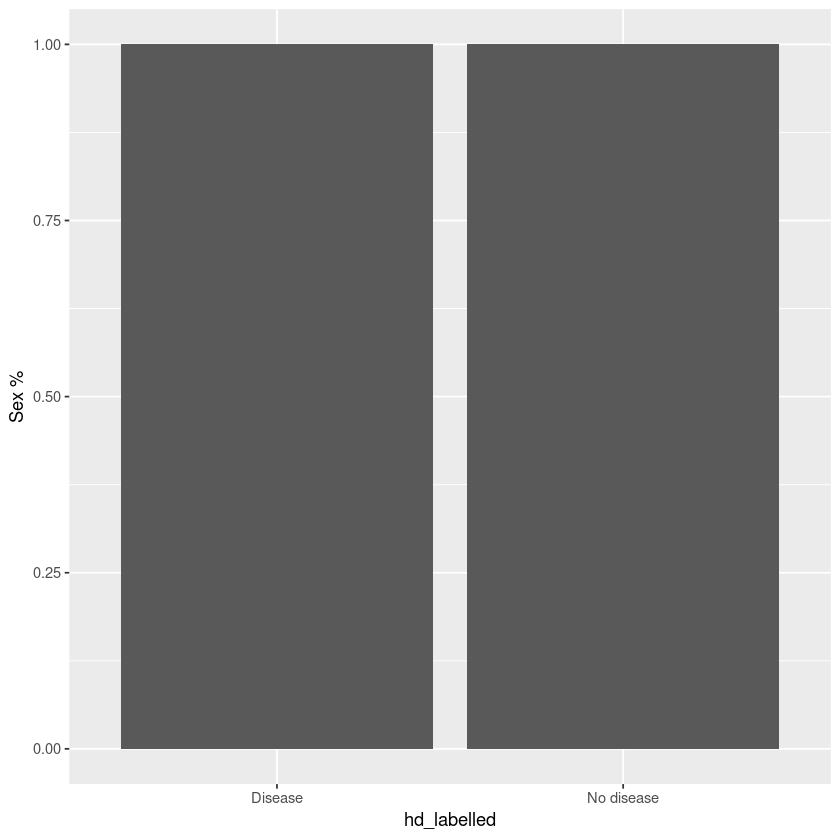

In [11]:
# Optional: visualize the sex associations

ggplot(data = hd_data, aes(x = hd_labelled, fill = sex)) + geom_bar(position = "fill") + ylab("Sex %")

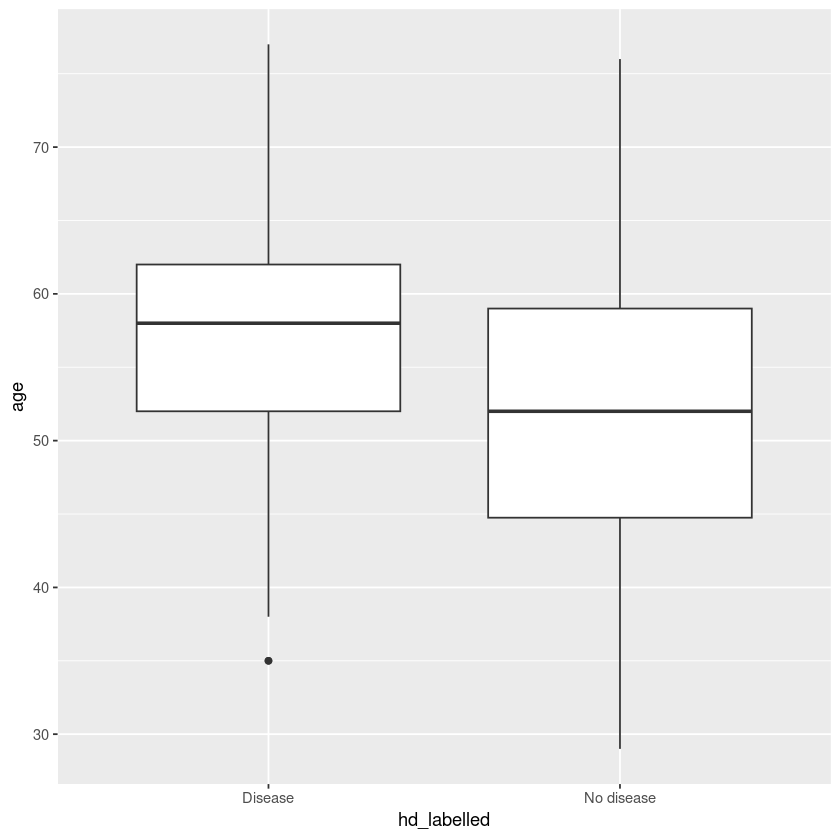

In [12]:
# Optional: visualize the age associations

ggplot(data = hd_data, aes(x = hd_labelled, y = age)) + geom_boxplot()

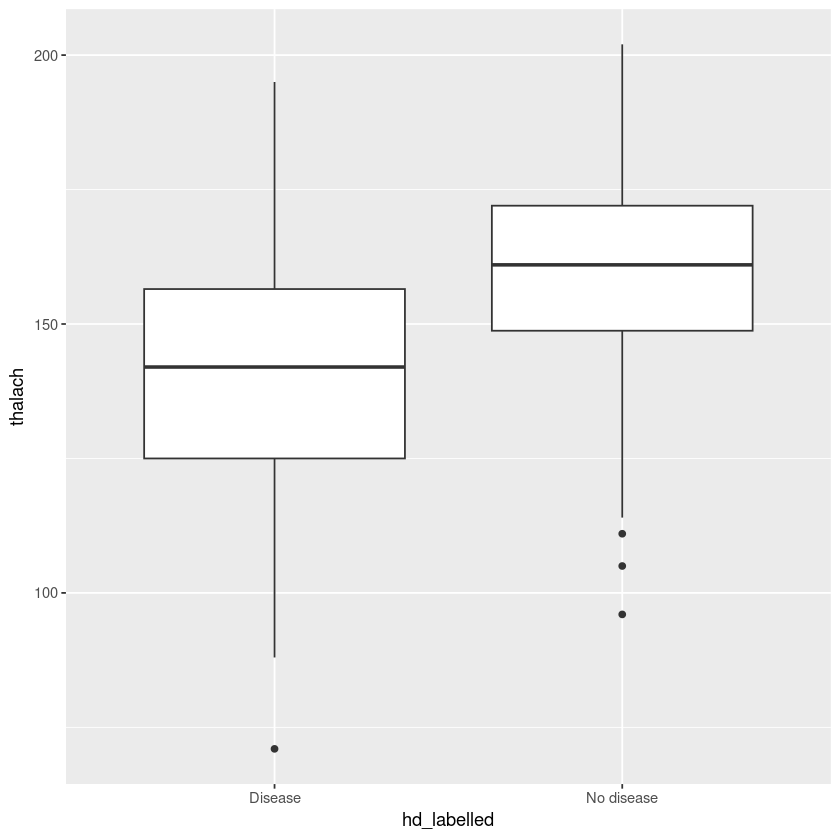

In [13]:
# Optional: visualize the thalach associations

ggplot(data = hd_data, aes(x = hd_labelled, y = thalach)) + geom_boxplot()

In [14]:
# Build a model to predict heart disease using the significant features as predictors

model <- glm(data = hd_data, hd ~ age + sex + thalach, family = "binomial" )

In [15]:
# Extract the model summary

summary(model)


Call:
glm(formula = hd ~ age + sex + thalach, family = "binomial", 
    data = hd_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2250  -0.8486  -0.4570   0.9043   2.1156  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.111610   1.607466   1.936   0.0529 .  
age          0.031886   0.016440   1.940   0.0524 .  
sex          1.491902   0.307193   4.857 1.19e-06 ***
thalach     -0.040541   0.007073  -5.732 9.93e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.98  on 302  degrees of freedom
Residual deviance: 332.85  on 299  degrees of freedom
AIC: 340.85

Number of Fisher Scoring iterations: 4


In [16]:
# Predict the probability of heart disease

pred_prob <- predict(model, hd_data, type="response")

In [17]:
# Create a decision rule using probability 0.5 as cutoff and save the predicted decision into the main data frame

hd_data$pred_hd <- ifelse(pred_prob >= 0.5, 1, 0)

In [18]:
# Calculate and print the accuracy score

accuracy <- accuracy(hd_data$hd, hd_data$pred_hd)
print(paste("Accuracy=", accuracy))

[1] "Accuracy= 0.70957095709571"


In [19]:
# Calculate and print the confusion matrix

confusion <- conf_mat(table(hd_data$hd, hd_data$pred_hd))
confusion

   
      0   1
  0 122  42
  1  46  93